<h1>Features Selection</h1>

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [14]:
warnings.filterwarnings('ignore')

def setup_matplot(titlesize=int(14),labelsize=int(12)):
    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = [10,8]
    plt.rcParams['figure.titlesize'] = titlesize
    plt.rcParams['figure.labelsize'] = labelsize
    return(plt)

plt = setup_matplot()

In [15]:
!pwd

/mnt/d/Projects/selectionfeatures


In [16]:
path = 'database/diabetes.csv'

df = pd.read_csv(f'{path}')

In [17]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [54]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 
        'SkinThickness', 'Insulin', 'BMI', 
        'DiabetesPedigreeFunction', 'Age']]

y = df['Outcome']

In [56]:
features_names = list(X.columns); features_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [30]:
X = X.to_numpy()
y = y.to_numpy()

In [31]:
X.shape

(768, 8)

In [32]:
y.shape

(768,)

In [33]:
test = SelectKBest(score_func=chi2, k=4)

fit = test.fit(X, y)

In [34]:
np.set_printoptions(precision=3)
print(fit.scores_)

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]


In [35]:
features = fit.transform(X)
print(features[0:5,:])

[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


In [37]:
kbest_importance = pd.Series(fit.scores_, index=features_names)
kbest_importance

Pregnancies                  111.519691
Glucose                     1411.887041
BloodPressure                 17.605373
SkinThickness                 53.108040
Insulin                     2175.565273
BMI                          127.669343
DiabetesPedigreeFunction       5.392682
Age                          181.303689
dtype: float64

In [39]:
std = np.std(fit.scores_,axis=0)

std

767.0024194378698

In [42]:
kbest_df = pd.DataFrame(kbest_importance).reset_index().rename(columns={'index':'Feature', 0:'Importancy'})

kbest_df.sort_values(by='Importancy', ascending=False, inplace=True)

kbest_df

,Feature,Importancy
4,Insulin,2175.565273
1,Glucose,1411.887041
7,Age,181.303689
5,BMI,127.669343
0,Pregnancies,111.519691
3,SkinThickness,53.108040
2,BloodPressure,17.605373
6,DiabetesPedigreeFunction,5.392682


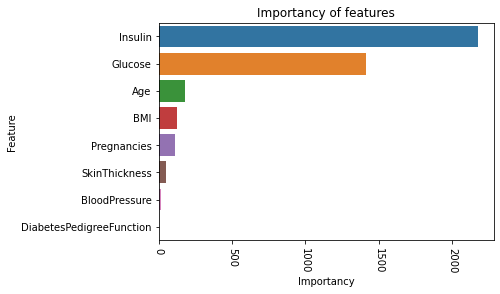

In [53]:
sns.barplot(data=kbest_df, y='Feature', x='Importancy')
plt.title('Importancy of features')
plt.xticks(rotation=270)
plt.show()